# Machine Learning Practicum: Heart Disease Dataset
In this practicum, we will explore the Heart Disease dataset using unsupervised learning methods and then apply a supervised learning algorithm.
We will:
1. Use PCA and clustering to explore the data in an unsupervised manner.
2. Apply a Random Forest classifier to predict the presence of heart disease.
Let's begin by loading the dataset.

In [1]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# Load Heart Disease dataset
df = pd.read_csv(url, names=col_names, na_values='?')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Dataset Overview
The Heart Disease dataset contains 303 samples with 14 features. The task is to classify whether a patient has heart disease (binary classification). Let's take a quick look at the structure of the dataset.

In [2]:
# Assuming df is your DataFrame and 'target' is your target column
# Number of samples
num_samples = df.shape[0]

# Number of features (excluding the target column)
num_features = df.shape[1] - 1  # Subtract 1 for the target column

# Number of unique target values
num_unique_targets = df['target'].nunique()

# Unique target values and their counts
unique_target_values = df['target'].value_counts()

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Number of unique target values: {num_unique_targets}")
print("\nUnique target values and their counts:")
print(unique_target_values)

Number of samples: 303
Number of features: 13
Number of unique target values: 5

Unique target values and their counts:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [3]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [4]:
# Fill missing values with the median for simplicity
df.fillna(df.median(), inplace=True)

## Standardize the Data
We'll standardize the feature values to make them suitable for PCA and clustering.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))

## Principal Component Analysis (PCA)
Let's apply PCA to reduce the dimensionality of the dataset and visualize it using 2 principal components.

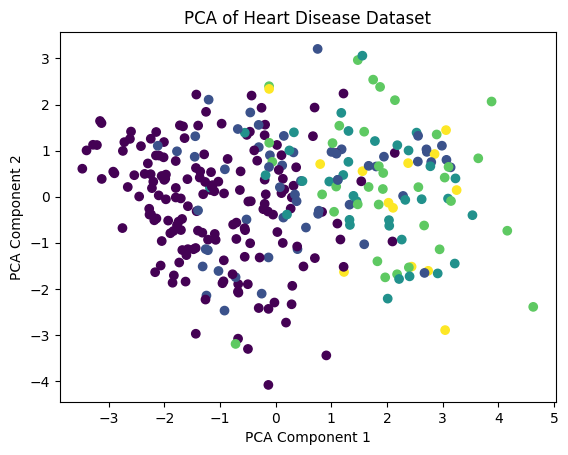

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA result
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['target'])
plt.title('PCA of Heart Disease Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Clustering: K-Means and DBSCAN
We'll now apply K-Means and DBSCAN to the scaled dataset and visualize the clusters.

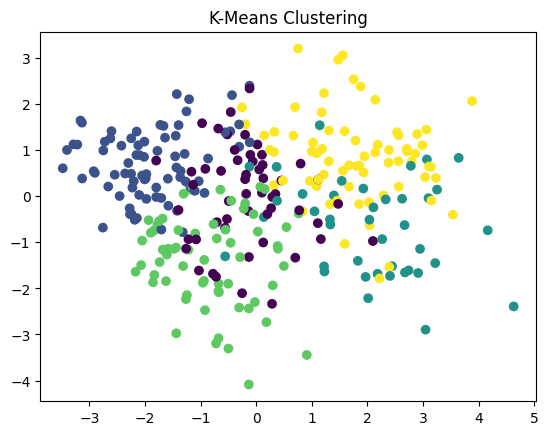

In [14]:
from sklearn.cluster import KMeans, DBSCAN

# Apply K-Means
kmeans = KMeans(n_clusters=5)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Plot K-Means result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans)
plt.title('K-Means Clustering')
plt.show()

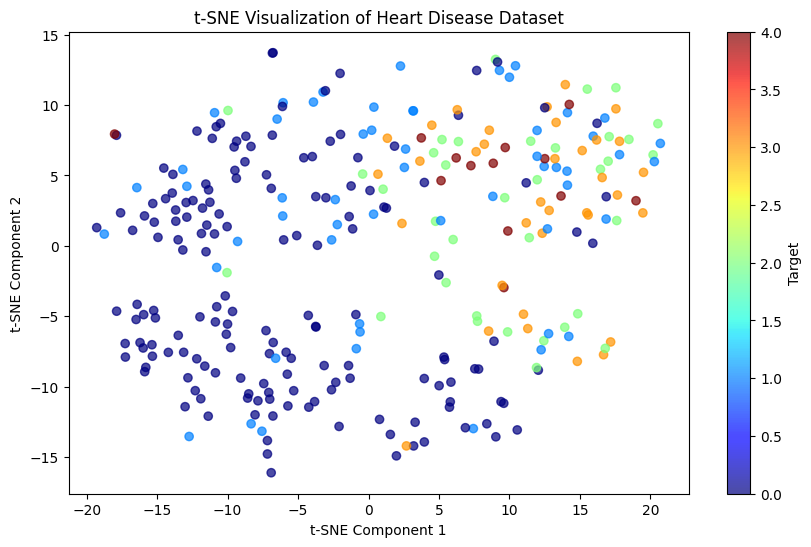

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to the scaled dataset
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['target'], cmap='jet', alpha=0.7)
plt.colorbar(label='Target')
plt.title('t-SNE Visualization of Heart Disease Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

    accuracy param_kernel  param_C  param_degree param_gamma
20  0.584828          rbf      1.0             2       scale
32  0.584828          rbf      1.0             4       scale
23  0.584828          rbf      1.0             2        auto
26  0.584828          rbf      1.0             3       scale
29  0.584828          rbf      1.0             3        auto
35  0.584828          rbf      1.0             4        auto
21  0.570764       linear      1.0             2        auto
24  0.570764       linear      1.0             3       scale
30  0.570764       linear      1.0             4       scale
27  0.570764       linear      1.0             3        auto
18  0.570764       linear      1.0             2       scale
33  0.570764       linear      1.0             4        auto
36  0.570764       linear     10.0             2       scale
39  0.570764       linear     10.0             2        auto
42  0.570764       linear     10.0             3       scale
45  0.570764       linea

/Users/wtheisen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wtheisen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wtheisen/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

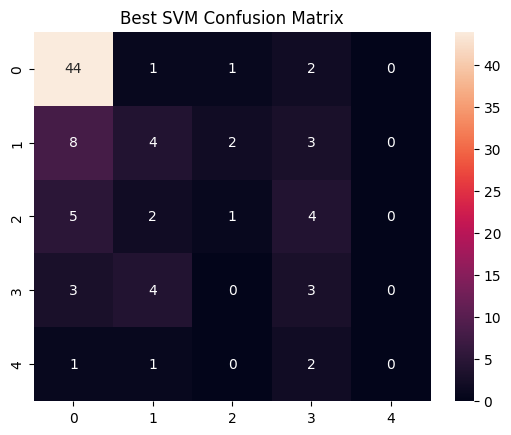

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SVM model
svm = SVC()

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.3, random_state=42)
grid_search.fit(X_train, y_train)

# Extract results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns and rename 'mean_test_score' to 'accuracy'
results = results[['mean_test_score', 'param_kernel', 'param_C', 'param_degree', 'param_gamma']]
results.rename(columns={'mean_test_score': 'accuracy'}, inplace=True)

# Fill NaN values for non-applicable parameters with 'None' for clarity
results.fillna('None', inplace=True)

# Reorder columns to make 'accuracy' the first column
results = results[['accuracy', 'param_kernel', 'param_C', 'param_degree', 'param_gamma']]

# Sort by accuracy
results = results.sort_values(by='accuracy', ascending=False)

# Print the table with all columns
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
print(results)

# Print the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions
best_svm = grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Display classification report for the best SVM model
print("\nBest SVM Model Classification Report:\n", classification_report(y_test, y_pred_best_svm))

# Confusion matrix for the best SVM model
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
sns.heatmap(cm_best_svm, annot=True, fmt='d')
plt.title('Best SVM Confusion Matrix')
plt.show()


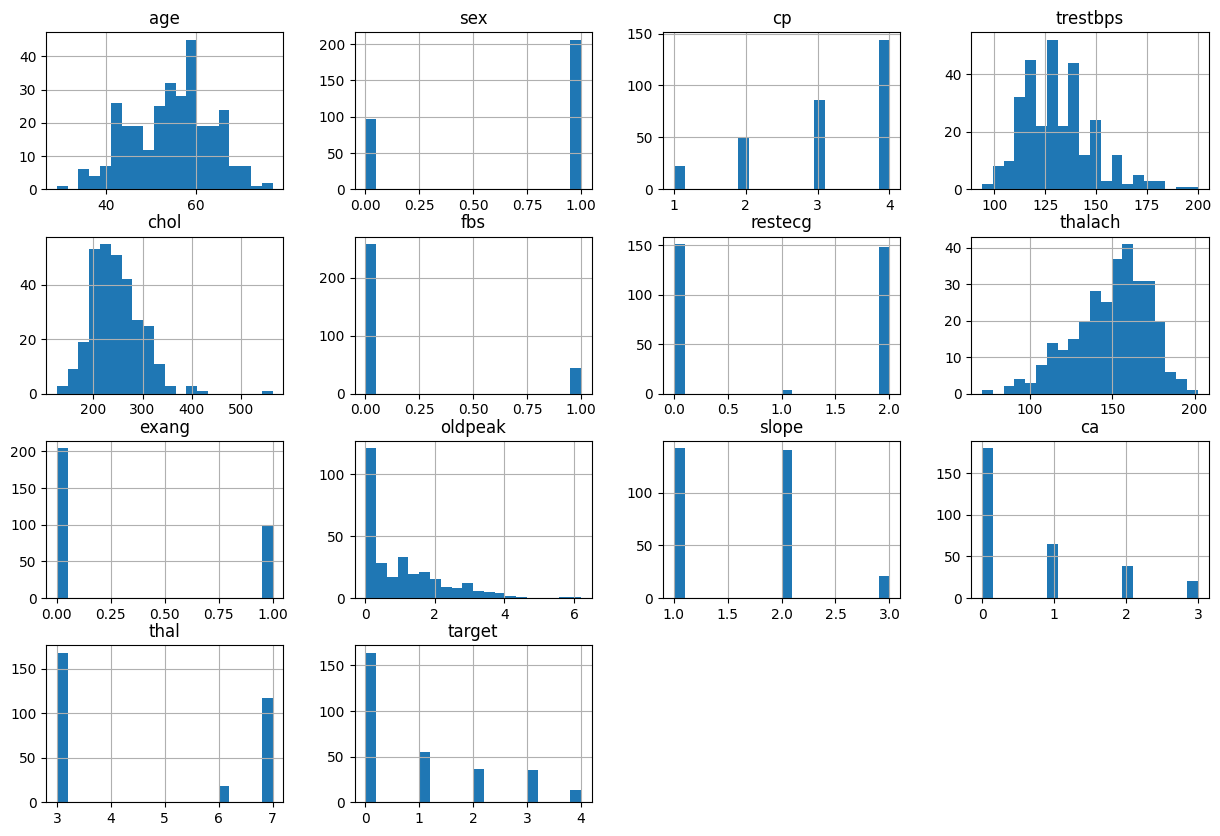

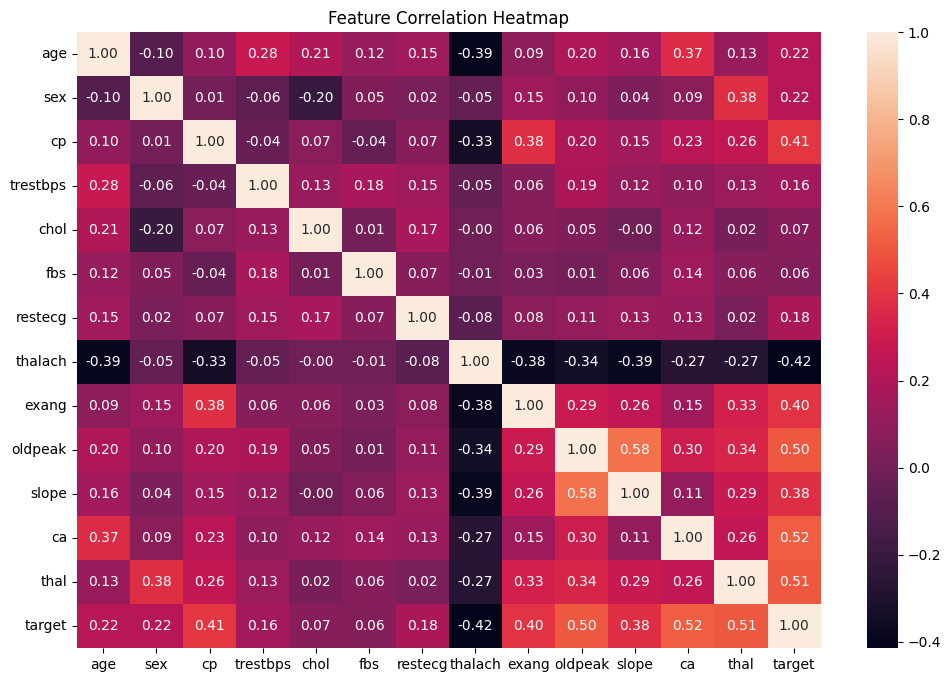

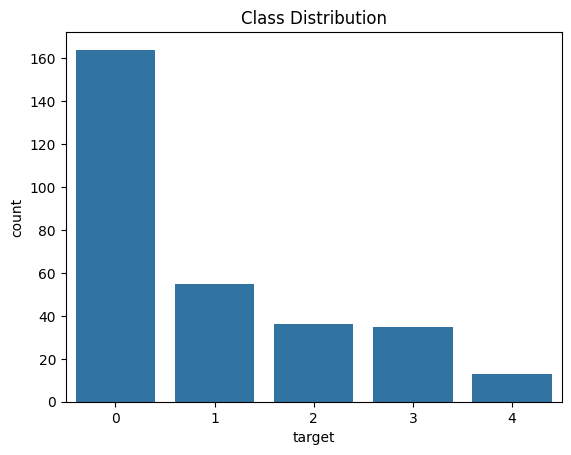

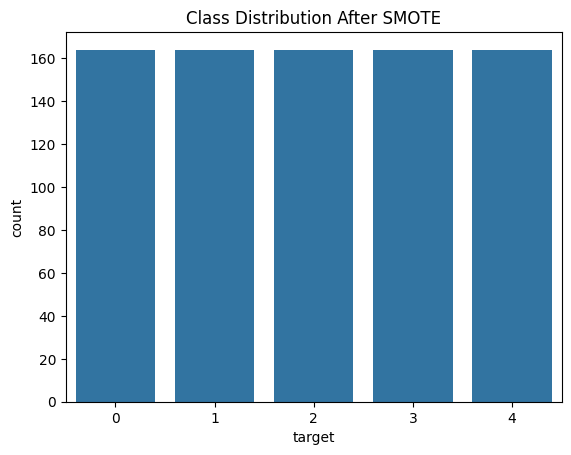

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Load and preprocess the data
# ... existing code ...

# EDA: Visualize feature distributions
df.hist(bins=20, figsize=(15, 10))
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# EDA: Check class distribution
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

# Data Augmentation: Apply SMOTE
X = df.drop(columns='target')
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new class distribution
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define a function to evaluate different models with additional strategies
def evaluate_models(X, y):
    # List of models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM (RBF Kernel)': SVC(kernel='rbf', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=8),
        'Decision Trees': DecisionTreeClassifier(max_depth=3, random_state=0),
        'Naive Bayes': GaussianNB()
    }
    
    # Feature selection
    feature_selector = SelectKBest(score_func=f_classif, k='all')  # Adjust 'k' as needed

    # Dimensionality reduction
    pca = PCA(n_components=8)  # Adjust the number of components as needed

    # Evaluate each model
    for name, model in models.items():
        # Create a pipeline with feature selection, PCA, and the model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('feature_selection', feature_selector),
            ('pca', pca),
            ('model', model)
        ])
        
        # Perform cross-validation
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
        print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Evaluate models on the scaled dataset
evaluate_models(X_scaled, df['target'])

print('-'*80)

# Evaluate models on the resampled dataset
evaluate_models(X_resampled, y_resampled)

Logistic Regression Accuracy: 0.58 (+/- 0.10)
SVM (RBF Kernel) Accuracy: 0.57 (+/- 0.04)
KNN Accuracy: 0.57 (+/- 0.05)
Decision Trees Accuracy: 0.58 (+/- 0.07)
Naive Bayes Accuracy: 0.59 (+/- 0.06)
--------------------------------------------------------------------------------
Logistic Regression Accuracy: 0.54 (+/- 0.08)
SVM (RBF Kernel) Accuracy: 0.76 (+/- 0.06)
KNN Accuracy: 0.78 (+/- 0.10)
Decision Trees Accuracy: 0.47 (+/- 0.06)
Naive Bayes Accuracy: 0.53 (+/- 0.06)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert the data to PyTorch tensors
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(df['target'].unique())
model = SimpleNN(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


results = []
for run in range(10):
    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')
        results.append(100 * correct / total)

print(f'Average accuracy over {len(results)} runs: {np.mean(results):.2f}%')

Accuracy of the model on the test set: 78.46%
Accuracy of the model on the test set: 79.27%
Accuracy of the model on the test set: 78.46%
Accuracy of the model on the test set: 78.05%
Accuracy of the model on the test set: 81.71%
Accuracy of the model on the test set: 84.96%
Accuracy of the model on the test set: 84.55%
Accuracy of the model on the test set: 84.55%
Accuracy of the model on the test set: 84.55%
Accuracy of the model on the test set: 80.49%
Average accuracy over 10 runs: 81.50%


In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define a function to evaluate different models with additional strategies
def evaluate_models(X, y):    
    # Feature selection
    feature_selector = SelectKBest(score_func=f_classif, k='all')  # Adjust 'k' as needed

    # Dimensionality reduction
    pca = PCA(n_components=8)  # Adjust the number of components as needed

    # Ensemble method: Voting Classifier
    ensemble = VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ], voting='soft')

    # Create a pipeline for the ensemble
    ensemble_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', feature_selector),
        ('pca', pca),
        ('ensemble', ensemble)
    ])

    # Perform cross-validation for the ensemble
    ensemble_scores = cross_val_score(ensemble_pipeline, X, y, cv=5, scoring='accuracy')
    print(f"Ensemble (Voting) Accuracy: {ensemble_scores.mean():.2f} (+/- {ensemble_scores.std() * 2:.2f})")

# Evaluate models on the scaled dataset
evaluate_models(X_scaled, df['target'])

print('-'*80)

# Evaluate models on the resampled dataset
evaluate_models(X_resampled, y_resampled)

Ensemble (Voting) Accuracy: 0.61 (+/- 0.08)
--------------------------------------------------------------------------------
Ensemble (Voting) Accuracy: 0.83 (+/- 0.06)


## Wrap-Up
In this practicum, we applied both unsupervised (PCA and clustering) and supervised (Random Forest) methods to the Heart Disease dataset. By first exploring the data using unsupervised techniques, we were able to gain insights that informed our supervised task.